<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Laboratorio 2</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2025-1</h2>
</center>

In [113]:
import numpy as np

# Funciones

Para la implementación de las preguntas, considere que **solo** tiene a su disposición las siguientes funciones:

* **np.array(x)**: Convierte **x** en un arreglo de NumPy.
* **np.arange(n)**: Para **n** un número entero positivo entrega un vector de largo **n** con números enteros desde 0 a n-1.
* **np.abs(x)**: Entrega el valor absoluto de **x**.
* **np.power(x)**: Evalúa la expresión $x^n$ si **x** y **n** son escalares. En caso de que **x** e **n** sean vectores, deben tener la misma
dimensión y entrega la evaluación elemento a elemento. Si solo uno de los términos es un vector, entrega el vector donde
el término constante se consideró para cada término de vector.
* **np.sqrt(x)**: Entrega la evaluación de la raíz cuadrada no negativa de un vector o escalar **x**.
* **np.sum(x)**: Entrega la suma de los elementos de un vector **x**.
* **solve_palu(A,b)**: Realiza el método PALU para resolver el sistema $A\vec{x}=\vec{b}$ y retorna la solución.
* **jacobi(A,b)**: Realiza el método de Jacobi para resolver el sistema $A\vec{x}=\vec{b}$ y retorna la matriz de iteraciones del vector solución $\vec{x}$.
* **jacobi_Matricial(A, b, n_iter=50)**: Realiza el método iterativo de Jacobi para resolver el sistema $A\vec{x}=\vec{b}$. Retorna una matriz donde cada fila corresponde a una iteración del vector solución $\vec{x}$.

* **np.linalg.norm(A, ord=1)**: Calcula la norma 1 de la matriz **A**, es decir, la suma máxima de valores absolutos por columna.

* **np.linalg.norm(A, ord=np.inf)**: Calcula la norma infinito de la matriz **A**, es decir, la suma máxima de valores absolutos por fila.

* **np.linalg.norm(A, ord=2)**: Calcula la norma 2 (o espectral) de la matriz **A**, que corresponde al mayor valor singular.

* **np.tril(A, k=0)**: Retorna una copia de la matriz **A** con todos los elementos por encima de la k-ésima diagonal puestos a cero. Por defecto, se obtiene la parte triangular inferior estricta con `k=-1`.

* **np.triu(A, k=0)**: Similar a `np.tril`, pero retorna la parte triangular superior de la matriz **A**.

* **np.diag(A)**: Si **A** es una matriz, retorna el vector con sus elementos diagonales. Si **A** es un vector, crea una matriz diagonal con esos elementos.


In [114]:
def solve_triangular(A, b, upper=True):
    n = b.shape[0]
    x = np.zeros_like(b)
    if upper==True:
        #perform backward-substitution
        x[-1] = (1./A[-1,-1]) * b[-1]
        for i in range(n-2, -1, -1):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,i+1:] * x[i+1:]))
    else:
        #perform forward-substitution
        x[0] = (1./A[0,0]) * b[0]
        for i in range(1,n):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,:i] * x[:i]))
    return x


#permutation between rows i and j on matrix A
def row_perm(A, i, j):
    tmp = np.copy(A[i])
    A[i] = A[j]
    A[j] = tmp


def palu_decomp(A, show=False, print_precision=2):
    N,_ = A.shape
    P = np.identity(N)
    L = np.zeros((N,N))
    U = np.copy(A)
    if show:
        print('Initial matrices')
        print('P = '); print(np.array_str(P, precision=print_precision, suppress_small=True))
        print('L = '); print(np.array_str(L+np.eye(N), precision=print_precision, suppress_small=True))
        print('U = '); print(np.array_str(U, precision=print_precision, suppress_small=True))
        print('----------------------------------------')
    #iterating through columns
    for j in range(N-1):
        #determine the new pivot
        p_index = np.argmax(np.abs(U[j:,j]))
        if p_index != 0:
            row_perm(P, j, j+p_index)
            row_perm(U, j, j+p_index)
            row_perm(L, j, j+p_index)
            if show:
                print('A permutation has been made')
                print('P = '); print(np.array_str(P, precision=print_precision, suppress_small=True))
                print('L = '); print(np.array_str(L+np.eye(N), precision=print_precision, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=print_precision, suppress_small=True))
                print('----------------------------------------')
        #iterating through rows
        for i in range(j+1,N):
            L[i,j] = U[i,j]/U[j,j]
            U[i] -= L[i,j]*U[j]
            if show:
                print('P = '); print(np.array_str(P, precision=print_precision, suppress_small=True))
                print('L = '); print(np.array_str(L+np.eye(N), precision=print_precision, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=print_precision, suppress_small=True))
                print('----------------------------------------')
    np.fill_diagonal(L,1)
    return P,L,U


def solve_palu(A, b, show=False, print_precision=2):
    P,L,U = palu_decomp(A, show, print_precision=print_precision)
    # A.x = b -> P.A.x = P.b = b' -> L.U.x = b'
    b = np.dot(P,b)
    # L.c = b' with c = U.x
    c = solve_triangular(L, b, upper=False)
    x = solve_triangular(U, c)
    return x


def jacobi(A, b, n_iter=50):
    n = A.shape[0]
    #array with solutions
    X = np.empty((n_iter, n))
    #initial guess
    X[0] = np.zeros(n)
    #submatrices
    D = np.diag(A)
    Dinv = D**-1
    R = A - np.diag(D) # R = (L+U)

    for i in range(1, n_iter):
        X[i] = Dinv*(b - np.dot(R, X[i-1]))

    return X


def jacobi_Matricial(A,b, n_iter=50):
    n = A.shape[0]
    #array with solutions
    X = np.empty((n_iter, n))
    #initial guess
    X[0] = np.zeros(n)

    L = np.tril(A,-1)
    U = np.triu(A,1)
    D = np.diag(np.diag(A))
    M = -np.dot(np.linalg.inv(D),L+U)
    b_hat= np.dot(np.linalg.inv(D),b)

    for i in range(1, n_iter):
        X[i] = np.dot(M,X[i-1]) + b_hat

    return X

# Método de Jacobi Matricial
Existen 2 formas alternativas de definir el método de *Jacobi*, y cada una tiene su utilidad propia. La segunda forma alternativa del método de Jacobi se basa en escribirlo en la siguiente forma $\mathbf{x}_{i+1} = M\,\mathbf{x}_i +\widehat{\mathbf{b}}.$
Es decir, la iteración de punto fijo se re-escribe como el producto de la matriz $M$ con el vector $x_i$ más un vector
constante $\widehat{\mathbf{b}}$. La cual se obtiene el siguiente desarrollo:
$$
\begin{align*}
    \mathbf{x}_{i+1} &= D^{-1}(\mathbf{b}-(L+U)\,\mathbf{x}_i)\\
    &= D^{-1}\mathbf{b}-D^{-1}(L+U)\,\mathbf{x}_i\\
    &= -D^{-1}(L+U)\,\mathbf{x}_i+D^{-1}\mathbf{b}
\end{align*}
$$

Entonces, la matriz $M$ para el método de Jacobi corresponde a $M = −D^{−1}(L+U)$ y el vector constante a $\widehat{\mathbf{b}} = D^{−1}\,\mathbf{b}$.

Si definimos el error como en $e_{n+1}= \|x_{n+1} −x_n\|$, obtenemos la siguiente relación:
$$e_{n+1} \leq \|M\|e_n$$

De la desigualdad anterior podemos concluir que si $\|M\| \le 1$, entonces el método reducirá el error, por lo tanto
convergerá. Una posible norma a utilizar es $\|M\|_{∞}$, pero se puede utilizar cualquier norma matricial. En realidad,
si se puede demostrar que para alguna norma matricial $\|M\| \le 1$, entonces el método iterativo anteriormente
descrito convergerá.

# Resistencias variables

Hasta ahora, el análisis de la red hidráulica se ha basado en un modelo donde los canales presentaban una resistencia constante. Esto permitió asumir una relación directa entre la diferencia de presión entre dos nodos y el caudal que circula por el canal que los conecta.

Ahora, con el fin de representar de manera más realista el efecto de la fricción en los conductos, se propone un nuevo modelo donde la resistencia ya no es constante, sino que depende de la magnitud del flujo. En particular, se considerará que la resistencia en cada canal está dada por:

$$
R_{ij} = R_0 \cdot \left(1 + \alpha (p_i - p_j)^2\right)
$$

donde:

* $R_0 > 0$ es una resistencia base,
* $\alpha > 0$ es un coeficiente de fricción.

Esto modifica la expresión del flujo, que ahora se calcula como:

$$
q_{ij} = \frac{p_i - p_j}{R_0 \cdot \left(1 + \alpha (p_i - p_j)^2\right)}
$$

Y, como en etapas anteriores, la ley de conservación de masa debe cumplirse en cada nodo. Es decir, la suma de los caudales que entran y salen de un nodo debe ajustarse al caudal neto $d_i$ en dicho nodo:

$$
\sum_{\text{entradas}(i)} \frac{p_j - p_i}{R_0 \cdot (1 + \alpha (p_i - p_j)^2)} + \sum_{\text{salidas}(i)} \frac{p_i - p_j}{R_0 \cdot (1 + \alpha (p_i - p_j)^2)} = d_i
$$

En particular, considere la siguiente red de canales hidráulicos:



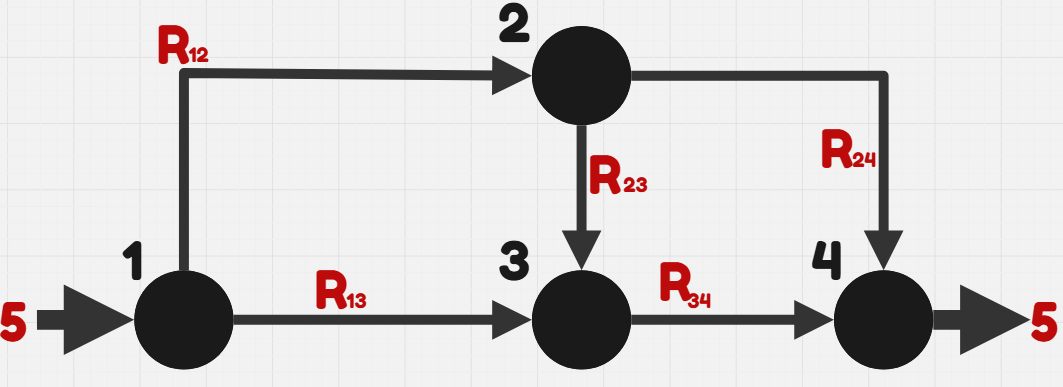

Para esta red, la aplicación de la ley de conservación de masa en cada nodo, utilizando la relación caudal-presión definida por la resistencia $R_ij(p_i−p_j)$, entrega el siguiente sistema de ecuaciones:

$$ (nodo ; 1) \qquad {\frac{p_{1}-p_{2}}{R_{0} * (1 + \alpha* (p_{1}-p_{2})^{2})}} +  {\frac{p_{1}-p_{3}}{R_{0} * (1 + \alpha* (p_{1}-p_{3})^{2})}} = -5$$

$$  (nodo ; 2) \qquad {\frac{p_{1}-p_{2}}{R_{0} * (1 + \alpha* (p_{2}-p_{1})^{2})}} + {\frac{p_{2}-p_{3}}{R_{0} * (1 + \alpha* (p_{2}-p_{3})^{2})}}+ {\frac{p_{2}-p_{4}}{R_{0} * (1 + \alpha* (p_{2}-p_{4})^{2})}} = 0$$

$$ (nodo ; 3) \qquad {\frac{p_{1}-p_{3}}{R_{0} * (1 + \alpha* (p_{3}-p_{1})^{2})}} + {\frac{p_{2}-p_{3}}{R_{0} * (1 + \alpha* (p_{3}-p_{2})^{2})}} + {\frac{p_{3}-p_{4}}{R_{0} * (1 + \alpha* (p_{3}-p_{4})^{2})} } = 0$$

$$ (nodo ; 4) \qquad {\frac{p_{2}-p_{4}}{R_{0} * (1 + \alpha* (p_{4}-p_{2})^{2})}} +  {\frac{p_{3}-p_{4}}{R_{0} * (1 + \alpha* (p_{4}-p_{3})^{2})}} = 5$$





# Preguntas

1. **(10 puntos)**
Como se ha observado en el contexto anterior, es posible utilizar métodos para resolver sistemas de ecuaciones lineales y así determinar los valores de presiones $p$ en una red hidráulica. Suponga ahora que los valores de caudal de entrada y salida del sistema cambian constantemente, mientras que la estructura del circuito permanece fija. ¿Cuál de los métodos conocidos recomendaría utilizar en este caso y por qué?
*hint: Think about what changes in the system of equations*

Como las ecuaciones pueden representarse como sistemas matriciales, y solo cambiaran los coeficientes a la derecha, entonces podemos utilizar el metodo PALU para resolver el problema. Como PALU crea una descomposicion de la matriz A, entonces podremos resolver el sistema eficientemente para cualquier b.

2. **(10 puntos)**
 Explique por qué los métodos implementados anteriormente (PALU y Jacobi) no funcionarían para resolver el sistema de ecuaciones asociado al modelo propuesto, y en cambio el método de *Newton* en $\mathbb{R}^{n}$ sí lo haría, fundamente y discuta el por qué.

Ambos sistemas no funcionarian por que solo sirven para sistemas de ecuaciones LINEALES, sin embargo, el metodo de Newton sirve para sistemas NO LINEALES.

3. **(25 puntos)**
implemente la función $\mathbf{F}(\mathbf{p})$ tal que $\mathbf{F}(\mathbf{p})  = \mathbf{0}$, correspondiente a la función $\mathbf{F}(\mathbf{x})$ del método de *Newton*, para el sistema de ecuaciones asociado al circuito entregado.

In [115]:
def F(p, R0, alpha):
    """
    input:
    p     : (ndarray) Pressure vector at each node of the system.
    R0    : (float) Base resistance of the channels.
    alpha : (float) coefficient in the resistance equation.

    output:
    f     : (ndarray) Vector of hydraulic imbalances evaluated at each node.
    """

    ###### acá va su código ######

    # Pasar cada elemento de p a pi
    print(p)
    p1 = p[0]
    p2 = p[1]
    p3 = p[2]
    p4 = p[3]

    # Los valores de R entregados
    R = np.array([-5., 0., 0., 5.])

    # Las restas de cada pi con pj
    pi_m_pj = np.array([ [p1-p2, p1-p3, 0], [p1-p2, p2-p3, p2-p4], [p1-p3, p2-p3, p3-p4], [0, p2-p4, p3-p4] ])

    # Las restas de cada pi con pj al cuadrado
    pi_m_pj_squared = np.power(pi_m_pj, 2)

    # Parte superior e inferior de las fracciones en cada termino
    top = pi_m_pj
    bottom = R0 * (1. + alpha * pi_m_pj_squared)
    bottom = 1 / bottom

    # Vector de puros unos
    ones = np.array([1.,1.,1.])
    
    # La funcion que f(p) que nos asegura f(p) = 0
    f = (top * bottom) @ ones - R

    ###### acá va su código ######
    return f

print(F(np.array([1.,2.,3.,4.]), 1., 1.))
print(F(np.array([1.,1.,1.,1.]), 1., 1.))
print(F(np.array([7.,8.,3.,6.]), 2., 3.))

[1. 2. 3. 4.]
[ 4.1 -1.4 -1.4 -5.9]
[1. 1. 1. 1.]
[ 5.  0.  0. -5.]
[7. 8. 3. 6.]
[ 4.91581633 -0.01518219  0.02013963 -4.97664835]


4. **(25 puntos)**
implemente la función ``is_diagonally_dominant(A)`` la cual dada una matríz $A$, verifica si es diagonal dominante.


In [116]:
def is_diagonally_dominant(A):
    """
    input:
    A         : (float) Matrix to determinate diagonal dominance.

    output:
    is_diagonal:(bool) Returns True if the matrix A is diagonally dominant; otherwise, returns False.
    """
    ###### acá va su código ######

    # La parte diagonal de la matriz
    A_diag = np.diag(np.full(A.shape[0], 1)) * np.diag(A)
    
    # La matriz sin su parte diagonal
    A_non_diag = A - A_diag
    
    # Asumienod que la matriz es cuadrada, sacamos su largo
    # y a partir de esto creamos un vector de unos
    ones = np.ones(A.shape[0])
    
    # Crea un vector con las diagonales y otro con las no diagonales
    # Resta ambos para evaluar posteriormente
    res = abs(A_diag @ ones.T) - abs(A_non_diag @ ones.T)
    
    # Por defecto no es diagonal
    is_diagonal = True

    # Revisa si tiene elementos menores a cero
    res_eval = res[res < 0]

    if (len(res_eval) != 0):
        is_diagonal = False

    ###### acá va su código ######
    return is_diagonal

matrix = np.array([ [1.,2.,3.], [4.,5.,6.], [7.,8.,9.] ])
print(is_diagonally_dominant(matrix))

matrix = np.array([ [9.,2.,3.], [0.,-5.,1.], [0.,6.,7.] ])
print(is_diagonally_dominant(matrix))

False
True


5. **(30 puntos)**
Implemente la función ``adaptative_Newton(A,b,iter=50,tol=1e-6)`` que realiza el método iterativo de *Newton* para $\mathbb{R}^n$, resolviendo el sistema de ecuaciones lineales en cada iteración utilizando el método de *Jacobi* clásico si es que se asegura la convergencia de este método, y PALU en otro caso. para ello considere que el Jacobiando de F corresponde a la siguiente implementación:


In [117]:
def JacF(p, R0, alpha):
    R = lambda pi, pj: R0 * (1 + alpha * (pi - pj)**2)
    dq_dpi = lambda pi, pj: (R(pi, pj) - (pi - pj) * (2 * R0 * alpha * (pi - pj))) / (R(pi, pj)**2)
    dq_dpj = lambda pi, pj: -dq_dpi(pj, pi)

    J = np.zeros((4, 4))
    J[0, 0] = dq_dpi(p[0], p[1]) + dq_dpi(p[0], p[2])
    J[0, 1] = dq_dpj(p[0], p[1])
    J[0, 2] = dq_dpj(p[0], p[2])
    J[1, 0] = dq_dpi(p[0], p[1])
    J[1, 1] = dq_dpj(p[0], p[1]) + dq_dpi(p[1], p[2]) + dq_dpi(p[1], p[3])
    J[1, 2] = dq_dpj(p[1], p[2])
    J[1, 3] = dq_dpj(p[1], p[3])
    J[2, 0] = dq_dpi(p[0], p[2])
    J[2, 1] = dq_dpi(p[1], p[2])
    J[2, 2] = dq_dpj(p[0], p[2]) + dq_dpj(p[1], p[2]) + dq_dpi(p[2], p[3])
    J[2, 3] = dq_dpj(p[2], p[3])
    J[3, 1] = dq_dpi(p[1], p[3])
    J[3, 2] = dq_dpi(p[2], p[3])
    J[3, 3] = dq_dpj(p[1], p[3]) + dq_dpj(p[2], p[3])

    return J

In [118]:
def adaptative_Newton(x0, R0, alpha, n, iter=50, tol=1e-6):
    """
    input:
    x0    : (ndarray) Initial guess for the pressure vector.
    R0    : (float) Base resistance used in the flow equation.
    alpha : (float) coefficient of the resistance.
    n     : (int) Number of nodes (length of the pressure vector).
    iter  : (int) Maximum number of iterations for the Newton-Raphson method. Default is 50.
    tol   : (float) Tolerance for convergence. Default is 1e-6.

    output:
    x     : (ndarray) Approximated solution vector after convergence of the Newton-Raphson method.
    """

    ###### acá va su código ######

    x = x0.copy

    A = F(x, R0, alpha)
    

    # Si es diagonalmente dominante, usar Jacobi
    if (is_diagonally_dominant(A)):
        for i in range(iter):
            x = JacF(x, R0, alpha)

        # Retornar antes de salir del if
        return x
    
    # Si NO es diagonalmente dominante, usar PALU
    else:
        # No termine de implementar esto
        # TODO: crear la matriz que represente el sistema
        x = solve_palu(x)

    ###### acá va su código ######
    return x

*Ejecute siguiente Celda para comprobar sus resultados*

In [120]:
adaptative_Newton([1,10,30,40],1,1,4)

<built-in method copy of list object at 0x0000017F65A7C7C0>


TypeError: 'builtin_function_or_method' object is not subscriptable